In [29]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import zipfile
import os
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [31]:
os.makedirs('database', exist_ok=True)

if not os.path.exists('database/data.rar'):
    !curl https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip -o database/data.rar

if not os.path.exists('database/UCI HAR Dataset.zip'):
    with zipfile.ZipFile('database/data.rar', 'r') as zip_ref:
        zip_ref.extractall('database/')

if not os.path.exists('database/UCI HAR Dataset'):
    with zipfile.ZipFile('database/UCI HAR Dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('database/')


In [32]:
path_labels = './database/UCI HAR Dataset/features.txt'
path_x_train = './database/UCI HAR Dataset/train/X_train.txt'
path_y_train = './database/UCI HAR Dataset/train/y_train.txt'

# Treinamento e Test

In [33]:
labels = []
dados_train_x = []
dados_train_y = []

with open(path_x_train, 'r') as f:
    dados_train_x = [line.strip().split() for line in f.readlines()]

with open(path_labels, 'r') as f:
    labels = [line.strip().split()[1] for line in f.readlines()]
    
with open(path_y_train, 'r') as f:
    dados_train_y = [line.strip() for line in f.readlines()]

labels.__len__(), dados_train_x.__len__(), dados_train_y.__len__()

(561, 7352, 7352)

In [34]:
dataframe_x = pd.DataFrame(dados_train_x, columns=labels)
dataframe_x.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


In [35]:
dataframe_y = pd.DataFrame(dados_train_y, columns=['Resultado'])
dataframe_y.head()

,Resultado
0,5
1,5
2,5
3,5
4,5


# Scaler

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe_x)
X_scaled[0][:5]

array([ 0.20064157, -0.0636826 , -0.41962845, -0.86881389, -0.93944133])

# PCA

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
var_explicada = pca.explained_variance_ratio_

print("Variância explicada por cada componente:", var_explicada)
print("Variância total explicada:", var_explicada.sum())

Variância explicada por cada componente: [0.50781172 0.0658068 ]
Variância total explicada: 0.5736185255809917


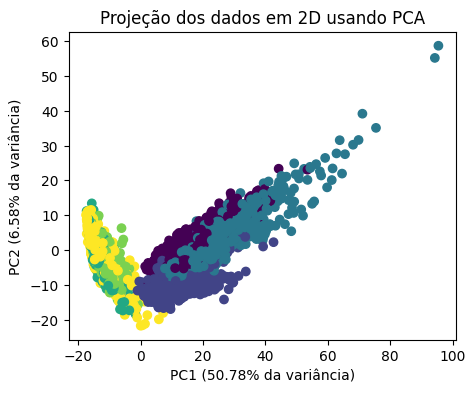

In [38]:
plt.figure(figsize=(5,4))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=dataframe_y['Resultado'].astype(int),
)

plt.xlabel(f"PC1 ({var_explicada[0]*100:.2f}% da variância)")
plt.ylabel(f"PC2 ({var_explicada[1]*100:.2f}% da variância)")
plt.title("Projeção dos dados em 2D usando PCA")
plt.show()


In [39]:
pca_full = PCA()
pca_full.fit(X_scaled)

variancia_acumulada = pca_full.explained_variance_ratio_.cumsum()
for i, variancia in enumerate(variancia_acumulada):
  if variancia >= 0.90:
    componentes_90 = i + 1
    break

print(f"Número de componentes necessários para 90% da variância: {componentes_90}")
print(f"Variância explicada com {componentes_90} componentes: {variancia_acumulada[componentes_90-1]:.4f}")

Número de componentes necessários para 90% da variância: 63
Variância explicada com 63 componentes: 0.9005


# RFE

In [ ]:
if os.path.exists('rfe_model.pkl'):
    with open('rfe_model.pkl', 'rb') as f:
        rfe = pickle.load(f)
else:
    rfe = None

In [ ]:
model = LogisticRegression(max_iter=1000)
n_features = X_scaled.shape[1]
scores = []

if rfe is not None:
  for k in range(n_features, 1, -1):
      rfe = RFE(estimator=model, n_features_to_select=k)
      X_rfe = rfe.fit_transform(X_scaled, dataframe_y.values.ravel())

      acc = cross_val_score(model, X_rfe, dataframe_y.values.ravel(), cv=5, scoring='accuracy').mean()
      scores.append((k, acc))
      print(f"Features: {k}, Acurácia média: {acc:.4f}")

  with open('rfe_model.pkl', 'wb') as f:
      pickle.dump(rfe, f)

print("Support", rfe.support_)
print("Ranking:", rfe.ranking_)


Features: 561, Acurácia média: 0.9350
Features: 560, Acurácia média: 0.9358
Features: 559, Acurácia média: 0.9346
Features: 558, Acurácia média: 0.9351
Features: 557, Acurácia média: 0.9351
Features: 556, Acurácia média: 0.9347
Features: 555, Acurácia média: 0.9347
Features: 554, Acurácia média: 0.9344
Features: 553, Acurácia média: 0.9354
Features: 552, Acurácia média: 0.9357
Features: 551, Acurácia média: 0.9357
Features: 550, Acurácia média: 0.9354
Features: 549, Acurácia média: 0.9351
Features: 548, Acurácia média: 0.9346
Features: 547, Acurácia média: 0.9346


In [59]:
tabela_ranking = pd.DataFrame({
    'Feature': dataframe_x.columns,
    'Ranking': rfe.ranking_
})
tabela_ranking = tabela_ranking.sort_values(by='Ranking')
tabela_ranking.head(10)

,Feature,Ranking
52,tGravityAcc-min()-X,1
366,fBodyAccJerk-entropy()-X,1
57,tGravityAcc-energy()-Y,2
102,tBodyAccJerk-entropy()-X,3
104,tBodyAccJerk-entropy()-Z,4
508,fBodyAccMag-energy(),5
41,tGravityAcc-mean()-Y,6
140,tBodyGyro-iqr()-Y,7
445,fBodyGyro-entropy()-X,8
558,"angle(X,gravityMean)",9
